import tensorflow as tf
import numpy as np
import pandas as pd
import cv2

print("All libraries imported successfully!")


# AI-DermalScan Project
## Step 1: Import Libraries

In [ ]:
import tensorflow as tf
print(tf.__version__)

In [ ]:
import numpy as np
import pandas as pd
import cv2
import os

In [ ]:
print("Libraries working correctly!")


In [13]:
import os

train_path = "dataset/train"

for class_name in os.listdir(train_path):
    path = os.path.join(train_path, class_name)
    num_images = len(os.listdir(path))
    print(f"{class_name}: {num_images} images")

clear skin: 300 images
dark spots: 303 images
puffy eyes: 300 images
wrinkles: 301 images


In [14]:
import os

# Path to training and testing datasets
train_path = "Dataset/train"
test_path = "Dataset/test"

# Check training Dataset
print("Training Dataset:")
for class_name in os.listdir(train_path):
    path = os.path.join(train_path, class_name)
    num_images = len(os.listdir(path))
    print(f"{class_name}: {num_images} images")

# Check testing Dataset
print("\nTesting Dataset:")
for class_name in os.listdir(test_path):
    path = os.path.join(test_path, class_name)
    num_images = len(os.listdir(path))
    print(f"{class_name}: {num_images} images")

Training Dataset:
clear skin: 300 images
dark spots: 303 images
puffy eyes: 300 images
wrinkles: 301 images

Testing Dataset:
clear skin: 300 images
dark spots: 303 images
puffy eyes: 300 images
wrinkles: 300 images


In [15]:
import os

# Path to training and testing datasets
train_path = "Dataset/train"
test_path = "Dataset/test"

# Check training Dataset
print("Training Dataset:")
for class_name in os.listdir(train_path):
    path = os.path.join(train_path, class_name)
    num_images = len(os.listdir(path))
    print(f"{class_name}: {num_images} images")

# Check testing Dataset
print("\nTesting Dataset:")
for class_name in os.listdir(test_path):
    path = os.path.join(test_path, class_name)
    num_images = len(os.listdir(path))
    print(f"{class_name}: {num_images} images")

Training Dataset:
clear skin: 300 images
dark spots: 303 images
puffy eyes: 300 images
wrinkles: 301 images

Testing Dataset:
clear skin: 300 images
dark spots: 303 images
puffy eyes: 300 images
wrinkles: 300 images


In [16]:
train_path = "ML Al-DermalScan Project/Dataset/Train"
test_path  = "ML Al-DermalScan Project/Dataset/Test"

In [17]:
train_path = "Dataset/Train"
test_path = "Dataset/Test"

In [18]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Image generator
datagen = ImageDataGenerator(rescale=1./255)

# Training data
train_gen = datagen.flow_from_directory(
    train_path,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

# Testing data
test_gen = datagen.flow_from_directory(
    test_path,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

Found 1426 images belonging to 4 classes.
Found 1203 images belonging to 4 classes.


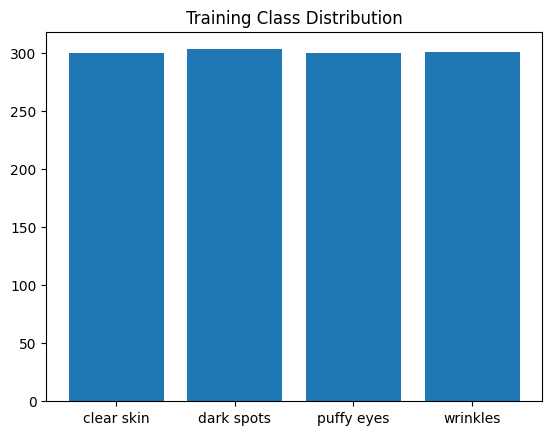

In [19]:
import matplotlib.pyplot as plt
import os

categories = os.listdir(train_path)
counts = [len(os.listdir(os.path.join(train_path, c))) for c in categories]

plt.bar(categories, counts)
plt.title("Training Class Distribution")
plt.show()

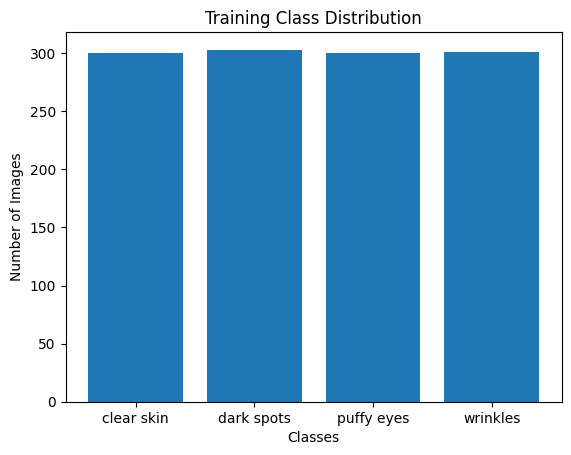

In [20]:
plt.bar(categories, counts)
plt.title("Training Class Distribution")
plt.xlabel("Classes")
plt.ylabel("Number of Images")

# Save the figure
plt.savefig("Module1_Class_Distribution.png", dpi=300, bbox_inches='tight')

plt.show()

In [21]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np

In [26]:
import os

base = os.environ["USERPROFILE"]

train_path = os.path.join(
    base,
    "OneDrive",
    "Desktop",
    "AI-Dermalscan_project",   
    "Dataset",
    "train"
)

print(train_path)
print(os.path.exists(train_path))
print(os.listdir(train_path))

C:\Users\91773\OneDrive\Desktop\AI-Dermalscan_project\Dataset\train
True
['clear skin', 'dark spots', 'puffy eyes', 'wrinkles']


In [28]:
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [30]:
# Get base user folder
base = os.environ["USERPROFILE"]

# Dataset path (adjust folder name if needed)
dataset = os.path.join(
    base,
    "OneDrive",
    "Desktop",
    "AI-DermalScan_Project",
    "Dataset"
)

# Check if dataset exists
print("Dataset path exists:", os.path.exists(dataset))
print("Contents of Dataset folder:", os.listdir(dataset))

Dataset path exists: True
Contents of Dataset folder: ['test', 'train']


In [31]:
# Training data augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,          # normalize
    rotation_range=20,       # rotate images
    width_shift_range=0.1,   # horizontal shift
    height_shift_range=0.1,  # vertical shift
    zoom_range=0.2,          # zoom
    horizontal_flip=True,    
    fill_mode='nearest',
    validation_split=0.2     # 80-20 split
)

# Validation data (only rescaling)
valid_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2
)

In [32]:
img_size = (224, 224)
batch_size = 32

train_generator = train_datagen.flow_from_directory(
    dataset,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',  # one-hot encoding
    shuffle=True,
    subset='training'
)

valid_generator = valid_datagen.flow_from_directory(
    dataset,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False,
    subset='validation'
)

Found 2104 images belonging to 2 classes.
Found 525 images belonging to 2 classes.


Class labels: ['test', 'train']


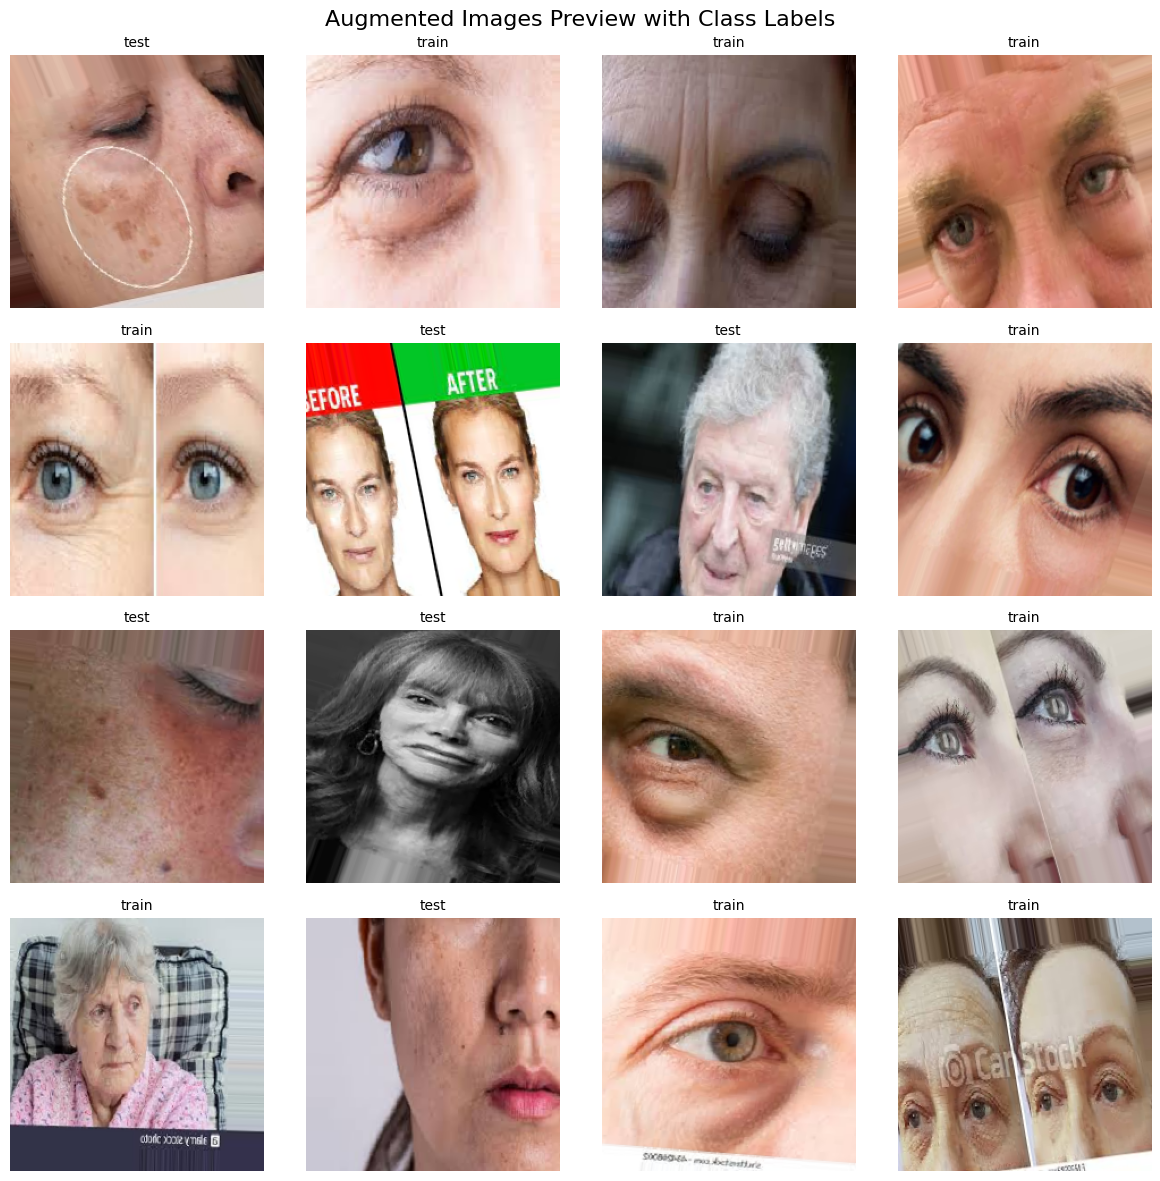

In [33]:
# Get class labels from generator
class_labels = list(train_generator.class_indices.keys())
print("Class labels:", class_labels)

# Take one batch of images
images, labels = next(train_generator)
class_indices = np.argmax(labels, axis=1)

plt.figure(figsize=(12,12))
for i in range(16):
    plt.subplot(4,4,i+1)
    plt.imshow(images[i])
    plt.axis('off')
    plt.title(class_labels[class_indices[i]], fontsize=10)

plt.suptitle("Augmented Images Preview with Class Labels", fontsize=16)
plt.tight_layout()
plt.show()

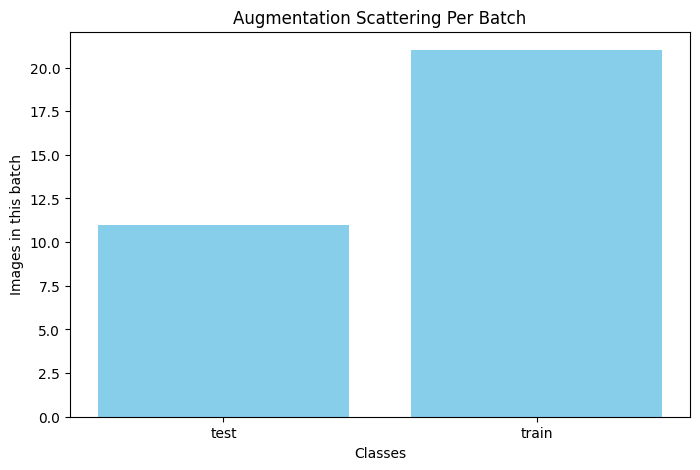

In [34]:
unique_classes, counts = np.unique(class_indices, return_counts=True)

plt.figure(figsize=(8,5))
plt.bar(class_labels, counts, color='skyblue')
plt.xlabel("Classes")
plt.ylabel("Images in this batch")
plt.title("Augmentation Scattering Per Batch")
plt.show()

In [35]:
train_path = os.path.join(dataset, "train")
test_path = os.path.join(dataset, "test")

In [36]:
train_generator = train_datagen.flow_from_directory(
    train_path,             # only train folder
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=True
)

valid_generator = valid_datagen.flow_from_directory(
    test_path,              # only test folder
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

Found 1426 images belonging to 4 classes.
Found 1203 images belonging to 4 classes.


Class labels: ['clear skin', 'dark spots', 'puffy eyes', 'wrinkles']


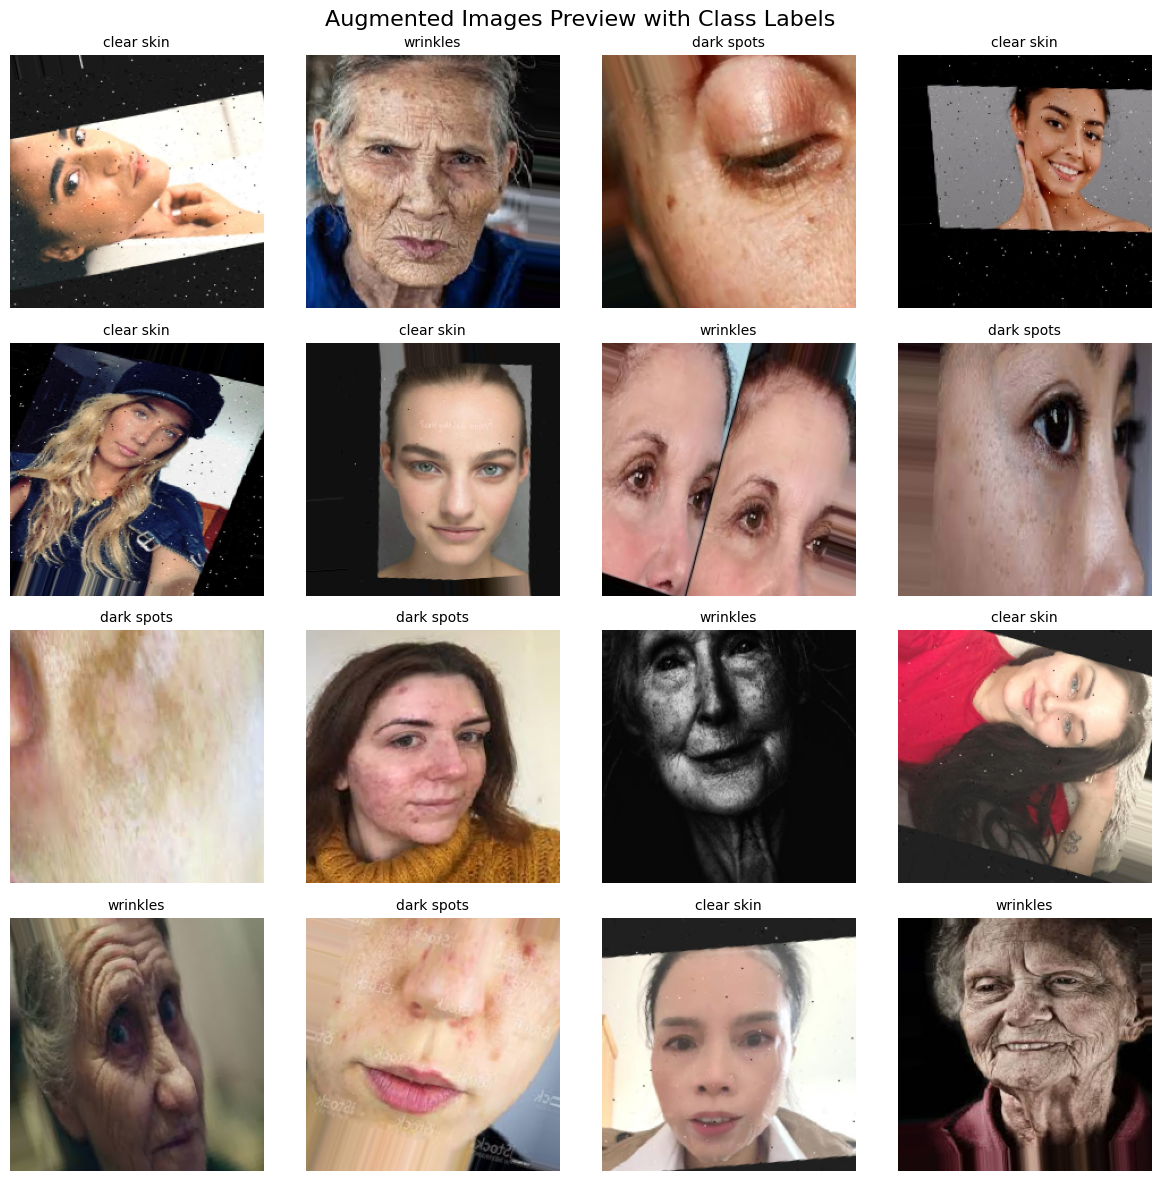

In [37]:
import matplotlib.pyplot as plt
import numpy as np

# Get class names
class_labels = list(train_generator.class_indices.keys())
print("Class labels:", class_labels)

# Take one batch
images, labels = next(train_generator)
class_indices = np.argmax(labels, axis=1)

plt.figure(figsize=(12,12))
for i in range(16):
    plt.subplot(4,4,i+1)
    plt.imshow(images[i])
    plt.axis('off')
    plt.title(class_labels[class_indices[i]], fontsize=10)

plt.suptitle("Augmented Images Preview with Class Labels", fontsize=16)
plt.tight_layout()
plt.show()

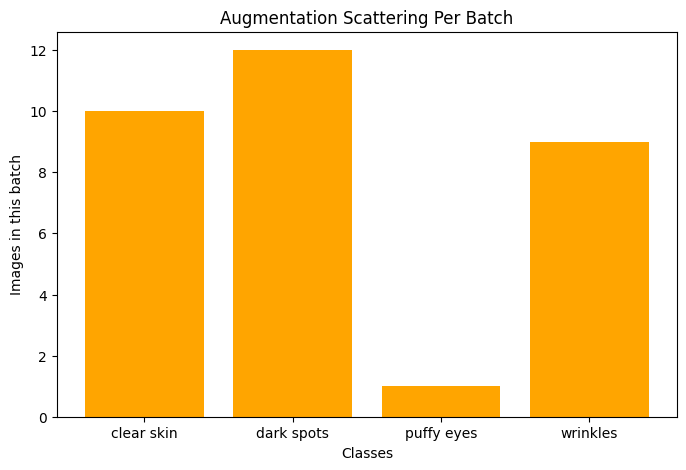

In [38]:
unique_classes, counts = np.unique(class_indices, return_counts=True)

plt.figure(figsize=(8,5))
plt.bar(class_labels, counts, color='orange')
plt.xlabel("Classes")
plt.ylabel("Images in this batch")
plt.title("Augmentation Scattering Per Batch")
plt.show()

In [39]:
# Second augmentation with different parameters
train_datagen2 = ImageDataGenerator(
    rescale=1./255,
    rotation_range=45,
    width_shift_range=0.2,
    height_shift_range=0.2,
    zoom_range=0.4,
    horizontal_flip=False,
    fill_mode='nearest'
)

train_generator2 = train_datagen2.flow_from_directory(
    train_path,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=True
)

Found 1426 images belonging to 4 classes.


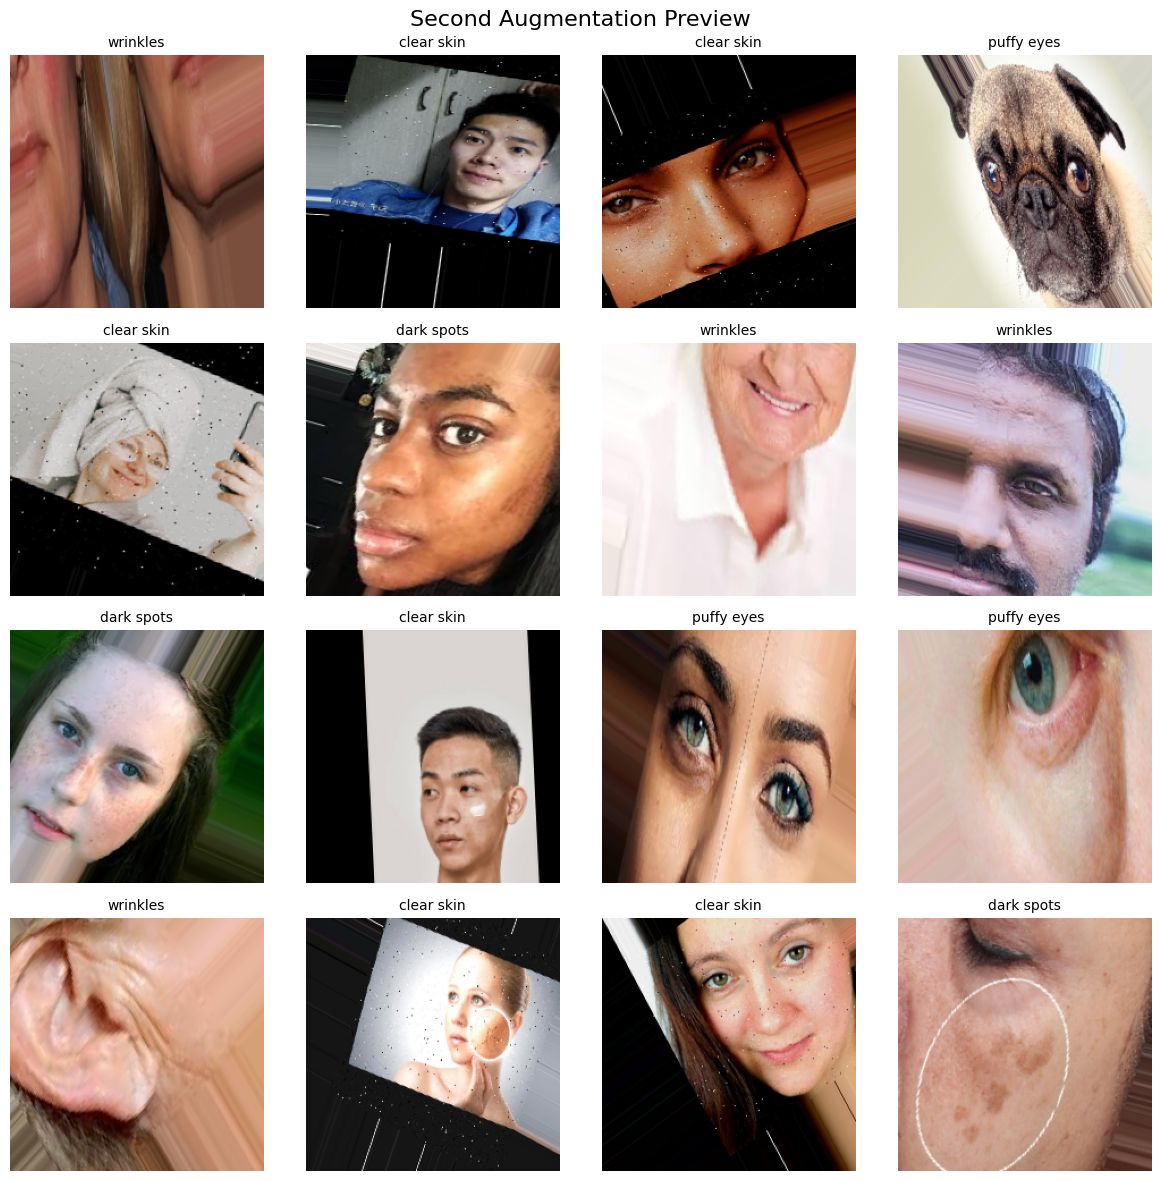

In [40]:
images2, labels2 = next(train_generator2)
class_indices2 = np.argmax(labels2, axis=1)
class_labels = list(train_generator2.class_indices.keys())

plt.figure(figsize=(12,12))
for i in range(16):
    plt.subplot(4,4,i+1)
    plt.imshow(images2[i])
    plt.axis('off')
    plt.title(class_labels[class_indices2[i]], fontsize=10)

plt.suptitle("Second Augmentation Preview", fontsize=16)
plt.tight_layout()
plt.show()

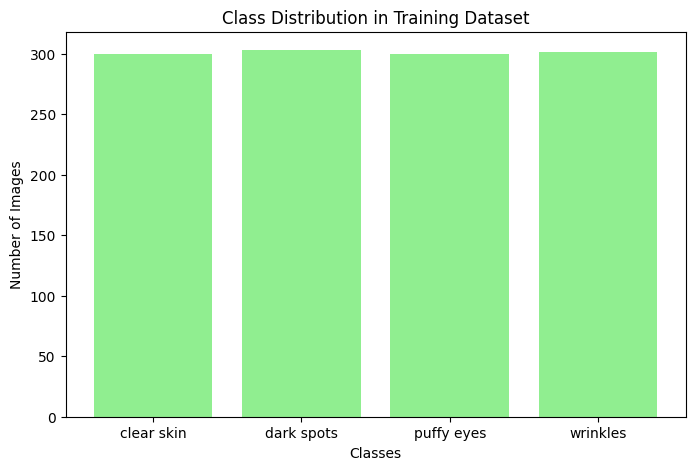

In [41]:
import collections

# Count images per class in train folder
train_classes = os.listdir(train_path)
counts = [len(os.listdir(os.path.join(train_path, cls))) for cls in train_classes]

plt.figure(figsize=(8,5))
plt.bar(train_classes, counts, color='lightgreen')
plt.title("Class Distribution in Training Dataset")
plt.xlabel("Classes")
plt.ylabel("Number of Images")
plt.show()